## Analysis 2: Binary classification between age groups


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge


df = pd.read_csv("mxmh survey results2.csv")

df = df[  ['Anxiety', 'Age', 'Hours per day', 'BPM']  ]

df.describe()



,Anxiety,Age,Hours per day,BPM
count,624.000000,624.000000,624.000000,624.000000
mean,5.866186,24.753205,3.713462,123.214744
std,2.767640,11.709293,3.092419,32.899605
min,0.000000,10.000000,0.000000,4.000000
25%,4.000000,18.000000,2.000000,100.000000
50%,6.000000,21.000000,3.000000,120.000000
75%,8.000000,27.000000,5.000000,144.000000
max,10.000000,89.000000,24.000000,220.000000


In [6]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

bins = [0, 19, 29, 39, 49, 59, 69, 200]
labels = ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

df_binary = df[df["Age Group"].isin(["30-39", "50-59"])].copy()

df_binary["target"] = (df_binary["Age Group"] == "50-59").astype(int)

print(df_binary["Age Group"].value_counts())
print(df_binary["target"].value_counts())


Age Group
30-39    67
50-59    17
0-19      0
20-29     0
40-49     0
60-69     0
70+       0
Name: count, dtype: int64
target
0    67
1    17
Name: count, dtype: int64


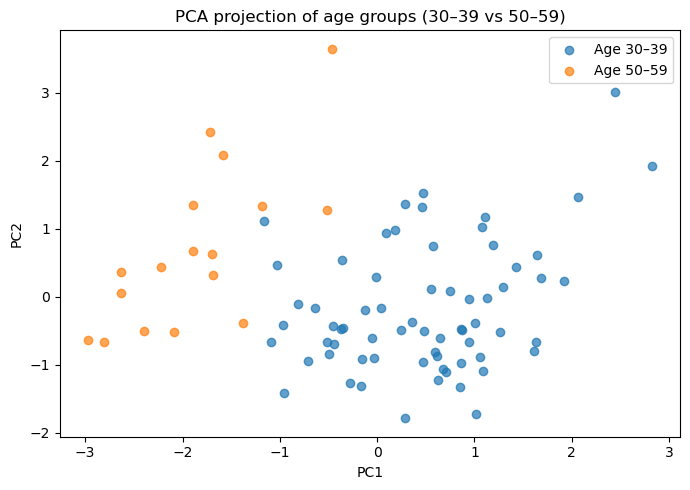

Explained variance ratio: [0.39735494 0.27384695]
Total variance explained: 0.6712018916127878


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


feature_cols = df_binary.select_dtypes(include="number").columns.drop("target", errors="ignore")

X = df_binary[feature_cols].replace([np.inf, -np.inf], np.nan).dropna()
y = df_binary.loc[X.index, "target"]

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.7, label="Age 30–39")
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.7, label="Age 50–59")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("PCA projection of age groups (30–39 vs 50–59)")
plt.legend()
plt.tight_layout()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", float(pca.explained_variance_ratio_.sum()))


In [ ]:
#the two age groups (30–39 and 50–59) exhibit partial separation in the low-dimensional feature space.

In [8]:
import pandas as pd

loadings = pd.DataFrame( pca.components_.T, columns=["PC1", "PC2"], index=feature_cols )

top_features = loadings["PC1"].abs().sort_values(ascending=False).head(8)
print("Top features by |PC1 loading|:")
print(top_features)

loadings


Top features by |PC1 loading|:
Anxiety          0.694009
Age              0.624207
Hours per day    0.351499
BPM              0.071865
Name: PC1, dtype: float64


,PC1,PC2
Anxiety,0.694009,-0.113253
Age,-0.624207,0.290474
Hours per day,0.351499,0.586629
BPM,0.071865,0.747439


In [ ]:
# The first two principal components explain approximately 67% of the total variance, indicating that a two-dimensional representation captures a substantial portion of the information in the original feature space.
# PC1 can be interpreted as a combined axis reflecting psychological state (Anxiety) and lifestyle-related music engagement (Hours per day), with age itself also contributing substantially.

## Set 2 Hours per day

Spearman rho = 0.101, p = 0.0116


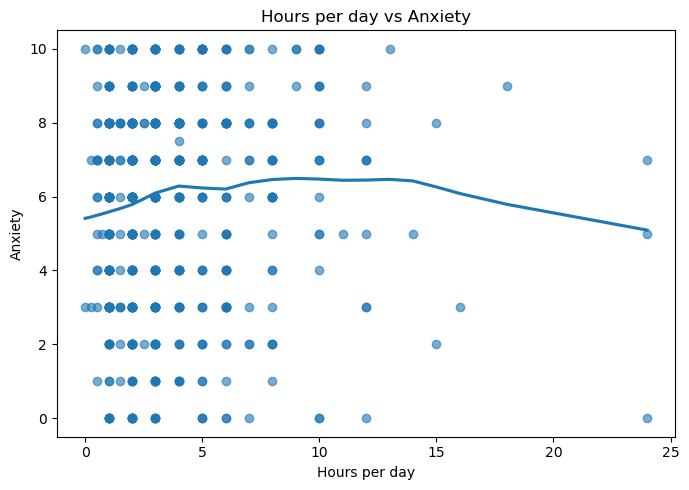

In [9]:
import seaborn as sns
from scipy.stats import spearmanr


d = df.copy()
d["Hours per day"] = pd.to_numeric(d["Hours per day"], errors="coerce")
d["Anxiety"] = pd.to_numeric(d["Anxiety"], errors="coerce")

d = d[(d["Hours per day"].notna()) & (d["Hours per day"] >= 0) & (d["Hours per day"] <= 24)]
d = d[["Hours per day", "Anxiety"]].dropna()

rho, pval = spearmanr(d["Hours per day"], d["Anxiety"])
print(f"Spearman rho = {rho:.3f}, p = {pval:.4f}")

plt.figure(figsize=(7,5))
sns.regplot(x="Hours per day", y="Anxiety", data=d, lowess=True, scatter_kws={"alpha":0.6})
plt.title("Hours per day vs Anxiety")
plt.tight_layout()
plt.show()


In [ ]:
# The correlation between hours of daily music listening and anxiety was weak and not statistically significant, indicating that listening time alone does not strongly predict anxiety level.
# This suggests that qualitative aspects of music engagement may be more important than duration.